<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Visualizacion_datos/blob/main/Pr1_VisualizacionDatos_AnaAlonso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Práctica csv de ventas**

Para la resolución de la práctica se deben seguir las siguientes instrucciones:

Se debe utilizar lalibrería de **MatplotLib**.

Y seguir los siguientes **4 pasos** para cada pregunta:

1) Pensar qué se va a pintar.

2) Pensar qué es necesario. Limpiar los datos.

3) Pintar la gráfica.

4) Explicar lo que se ha pintado (2 líneas).

In [1]:
pip install matplotlib

In [2]:
pip install seaborn

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.function_base import linspace
from math import floor
from math import ceil
from numpy.ma.core import size
import statsmodels.api as sm
import seaborn as sns

Dado el siguiente Dataset, se procede a explicar todas las variables que contiene.

In [74]:
# Lectura de la base de datos
filename = 'eu_sample_2.csv'
data = pd.read_csv(filename, sep = ',')

# Revisión de los datos
print(data.shape)
data.head(10)

(5399, 11)


,YR,PRD,MONTH,DATE,SCENRO,MU,BU,SCTR,CNTRY,SUBBRAND,AMT
0,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1233,20969.017914
1,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1259,141.987137
2,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_24,1058.399611
3,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_837,30813.110677
4,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_956,2254.041831
5,2018,2.0,1,2018-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1233,26737.962565
6,2018,2.0,1,2018-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1259,249.610787
7,2018,2.0,1,2018-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_24,1403.038330
8,2018,2.0,1,2018-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_837,45561.428783
9,2018,2.0,1,2018-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_956,3261.107550


La definición de las variables es:

Year: año.

Periodo (PRD) se ignora para esta práctica.

Month: mes.

Date: día 1 del mes que indica.

Scenario (SCENRO): no aporta información, ya que siempre tiene el valor ACTUAL.

Market Unit (MU).

Bussines Unit (BU).

Sector (SCTR) en este dataset siempre es Europe.

CNTRY = Country

SUBBRAND: producto que tuvo ese volumen.

AMT: el volumen de venta (OBJETIVO).

Procedemos a estudiar y limpiar los datos.

Eliminamos los Nan (que en este caso no hay) y los datos de AMT < 0, ya que no puede haber un volumen de ventas negativo.

In [75]:
data = data.dropna()

condition = data['AMT'] < 0

data = data[~condition]

data.shape

(5367, 11)

## 1. ¿Cuál es la distribución de volumen entre todas las BU y entre todas las MU? (por separado).

<ipython-input-6-f07f600fff55>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  BU = data.groupby('BU').sum()


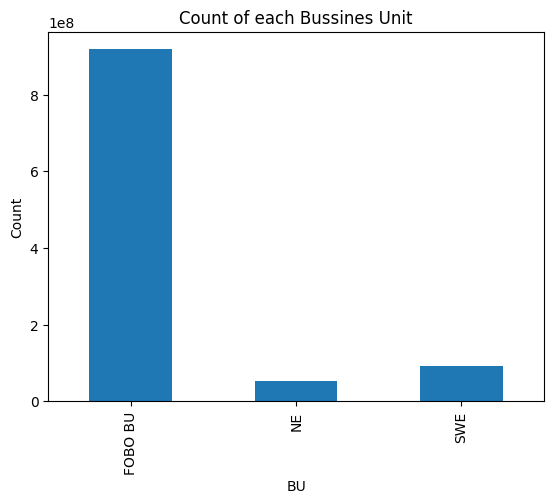

In [6]:
BU = data.groupby('BU').sum()

BU['AMT'].plot(kind='bar')
plt.xlabel('BU')
plt.ylabel('Count')
plt.title('Count of each Bussines Unit')
plt.show()

Podemos observar que la forma en la que se distribuye el volumen nos devuelve que FOBO BU tiene mucho más volumen que las otras dos. Procedemos a visualizar un pie chart que nos muestre los diferentes porcentajes de distribución.

He elegido un gráfico de barras debido a que son solo 3 variables y se ve con claridad cual de las 3 tiene mayor volumen. Sin embargo, esto no responde realmente a la pregunta, pues lo que pide es la distribución, por lo que procedemos a crear un gráfico de tarta donde nos mostrará cada uno de los porcentajes.

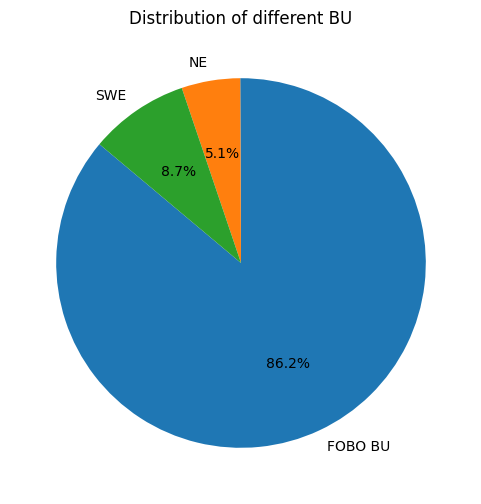

In [7]:
# Create a pie chart with labels and percentages

plt.figure(figsize=(6, 6))
plt.pie(BU['AMT'], labels=BU['AMT'].index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of different BU')
plt.show()

Las cantidades de volumen entre las distintas BU, es decir, la distribución, es de 86.2% FOBO BU, 8.7% SWE y 5.1% NE.

In [8]:
BU['AMT']

BU
FOBO BU    9.183012e+08
NE         5.465446e+07
SWE        9.265429e+07
Name: AMT, dtype: float64

En el caso de las distintas MUs, tenemos 9 diferentes como podemos ver a continuación. Es por ello que usar un Pie Chart no nos serviría.

In [9]:
MU = data.groupby('MU', as_index=False).sum()
MU = MU.sort_values(by='AMT', ascending=False).reset_index()
MU1 = MU[0:4]



MU2 = MU[4:9]
AMT_otros = MU2["AMT"].values[0] + MU2["AMT"].values[1] + MU2["AMT"].values[2] + MU2["AMT"].values[3] + MU2["AMT"].values[4]
AMT_otros

# MU1.append(['0', '0', '0', AMT_otros])

new_row = {'MU':'Otros','YR':0, 'PRD':0, 'MONTH':5, 'AMT':AMT_otros}
MU = MU1.append(new_row, ignore_index=True)

MU = MU.sort_values(by='AMT', ascending=False).reset_index()

MU

<ipython-input-9-784bdaa5a88f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MU = data.groupby('MU', as_index=False).sum()
<ipython-input-9-784bdaa5a88f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MU = MU1.append(new_row, ignore_index=True)


,level_0,index,MU,YR,PRD,MONTH,AMT
0,0,4.0,GBI FOBO,772702,2878.0,2495,4.171442e+08
1,1,6.0,NE FOBO,2449259,9172.0,7958,2.281415e+08
2,2,0.0,BCCA FOBO,1803646,6818.0,5924,1.473676e+08
3,4,NaN,Otros,0,0.0,5,1.473088e+08
4,3,2.0,CE FOBO,4047156,15493.0,13487,1.256480e+08


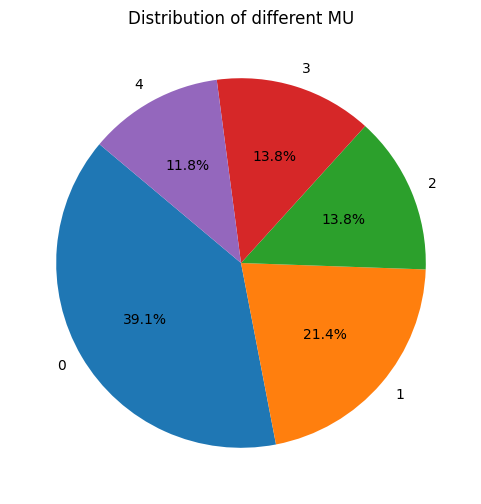

In [10]:
# Create a pie chart with labels and percentages

plt.figure(figsize=(6, 6))
plt.pie(MU['AMT'], labels=MU['AMT'].index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of different MU')
plt.show()

Podemos observar que la distribución mostrada nos devuelve un 13.8% del volumen del total de datos. Es decir, este método no nos sirve del todo, debido a que no es el valor más bajo de la distribución el de 'otros'.


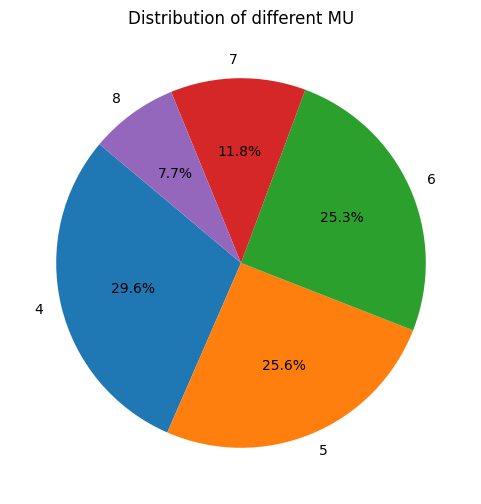

In [11]:
# Create a pie chart with labels and percentages

plt.figure(figsize=(6, 6))
plt.pie(MU2['AMT'], labels=MU2['AMT'].index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of different MU')
plt.show()

Además, aquí observamos que las 5 MUs con menor volumen se distribuyen de esta manera. Aplicando los porcentajes de este último gráfico al porcentaje total que ocupan en el primero, podríamos sacar el porcentaje exacto de cada una de las MUs pertenecientes a 'otros'.

De más alto a más bajo serían los siguientes: 4.09%, 3.53%, 3.49%, 1.63% y 1.06%

No realizamos un gráfico de tarta con todas las MUs por separado debido a que no se debe realizar con más de 5 variables diferentes para que se vea adecuadamente.

###1.1 ¿Cuáles son las MU con más volumen?

<ipython-input-12-1681fabfd268>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MU = data.groupby('MU').sum()


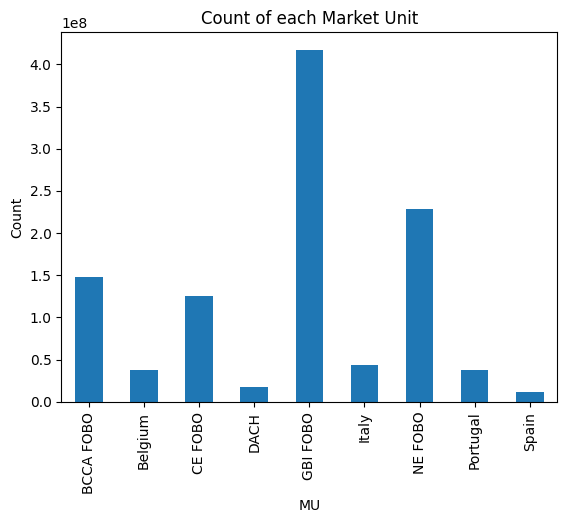

In [12]:
MU = data.groupby('MU').sum()

MU['AMT'].plot(kind='bar')
plt.xlabel('MU')
plt.ylabel('Count')
plt.title('Count of each Market Unit')
plt.show()

Tras graficar el bar chart con los volumenés de las diferentes MU's, podemos responder a la pregunta planteada.

Las MU's con más volumen son GBI FOBO, con mucha diferencia con el resto de MU's, seguida de NE FOBO.

Para sacar la distribución de volumen entre los MU's no hacemos el Pie Chart, ya que hay un número de categorías (MU's) distintos muy grande, hay 9 categorías diferentes.

He elegido usar la gráfica de barras ya que se ve claramente qué MUs tienen mayor volumen.

###1.2 En la BU de España, ¿cuál es el ranking de España dentro de su BU?

Antes de contestar a la pregunta plantada, comprobamos que España (como país) pertenece a una única BU. Y vemos que así es, concretamente a la BU = SWE.

In [13]:
data_Spain = data.loc[data['CNTRY'] == 'Spain']

data_Spain_BU = data_Spain.groupby(data_Spain['BU']).count()

data_Spain_BU

,YR,PRD,MONTH,DATE,SCENRO,MU,SCTR,CNTRY,SUBBRAND,AMT
BU,,,,,,,,,,
SWE,304,304,304,304,304,304,304,304,304,304


<ipython-input-14-c6c790fd7b34>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SWE = data_SWE.groupby('CNTRY').sum()


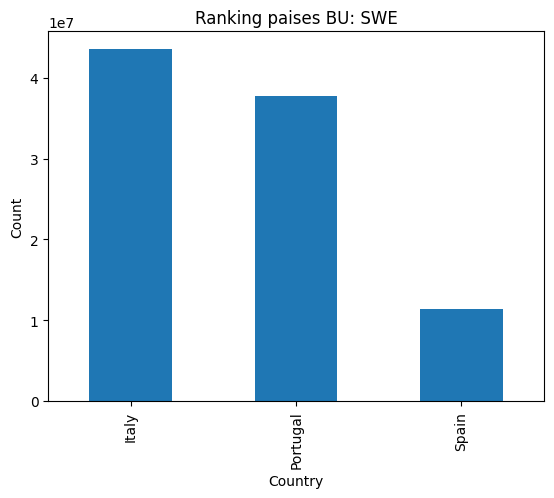

In [14]:
# Creamos un dataframe que contenga solo los registros que pertenecen a la BU SWE
data_SWE = data.loc[data['BU'] == 'SWE']

SWE = data_SWE.groupby('CNTRY').sum()
SWE['AMT'].plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Ranking paises BU: SWE')
plt.show()

Observamos que el bar chart nos devuelve que España es el tercero de tres paises que pertenecen a la BU SWE en cuanto a volumen de venta que tiene.

El primero es Italia y el segundo Portugal.

##2. De España, ¿cuál es la tendencia y la estacionalidad de la serie?

Lo primero de todo, será separar del dataset (creando uno nuevo) solo los registros de España. Como vemos a continuación, hay un total de 304 registros.

In [56]:
data_Spain = data.loc[data['CNTRY'] == 'Spain']
data_Spain.shape

(304, 11)

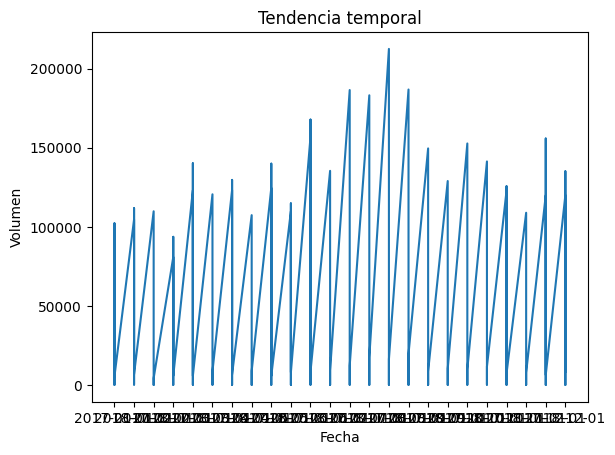

In [57]:
# Ejemplo de un gráfico de líneas para analizar la tendencia temporal
plt.plot(data_Spain['DATE'], data_Spain['AMT'])
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Tendencia temporal')
plt.show()

In [82]:
media = data_Spain['AMT'].mean()
mediana = data_Spain['AMT'].median()
desviacion_estandar = data_Spain['AMT'].std()

In [83]:
# Ejemplo de regresión lineal
from sklearn.linear_model import LinearRegression

X = data_Spain[['AMT']]
y = data_Spain['AMT']

modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [84]:
pendiente = modelo.coef_
intercepto = modelo.intercept_

print(f"Pendiente: {pendiente}")
print(f"Intercepto: {intercepto}")

Pendiente: [1.]
Intercepto: 7.275957614183426e-12


In [78]:
# data = pd.read_csv('eu_sample_2.csv', parse_dates=['DATE'], index_col='DATE')


# data = data.dropna()

# data = data[~(data['AMT'] < 0)]

data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

data_Spain = data.loc[data['CNTRY'] == 'Spain']

,YR,PRD,MONTH,SCENRO,MU,BU,SCTR,CNTRY,SUBBRAND,AMT
DATE,,,,,,,,,,
2017-01-01,2017,2.0,1,Actual,Spain,SWE,Europe,Spain,L3_1233,101990.507421
2017-01-01,2017,2.0,1,Actual,Spain,SWE,Europe,Spain,L3_1259,30138.003424
2017-01-01,2017,2.0,1,Actual,Spain,SWE,Europe,Spain,L3_2198,3301.726628
2017-01-01,2017,2.0,1,Actual,Spain,SWE,Europe,Spain,L3_24,102062.302311
2017-01-01,2017,2.0,1,Actual,Spain,SWE,Europe,Spain,L3_26,28191.584539
...,...,...,...,...,...,...,...,...,...,...
2018-12-01,2018,13.0,12,Actual,Spain,SWE,Europe,Spain,L3_3838,1522.179876
2018-12-01,2018,13.0,12,Actual,Spain,SWE,Europe,Spain,L3_410,33245.581284
2018-12-01,2018,13.0,12,Actual,Spain,SWE,Europe,Spain,L3_738,985.889696


In [81]:
decomposition = sm.tsa.seasonal_decompose(data_Spain['AMT'], model='additive', extrapolate_trend=12)
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

ValueError: ignored

##3. Si tuvieses que mejorar las ventas de Europa, ¿en qué país te centrarías?

Primero creamos un dataframe nuevo agrupado por paises, sumamos sus valores y ordenamos según el valor del volumen de ventas (AMT), para centrarnos en dicha categoría.

<ipython-input-53-4e1b7222bfa4>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = data_country.pivot('CNTRY', 'AMT', 'AMT').fillna(0)


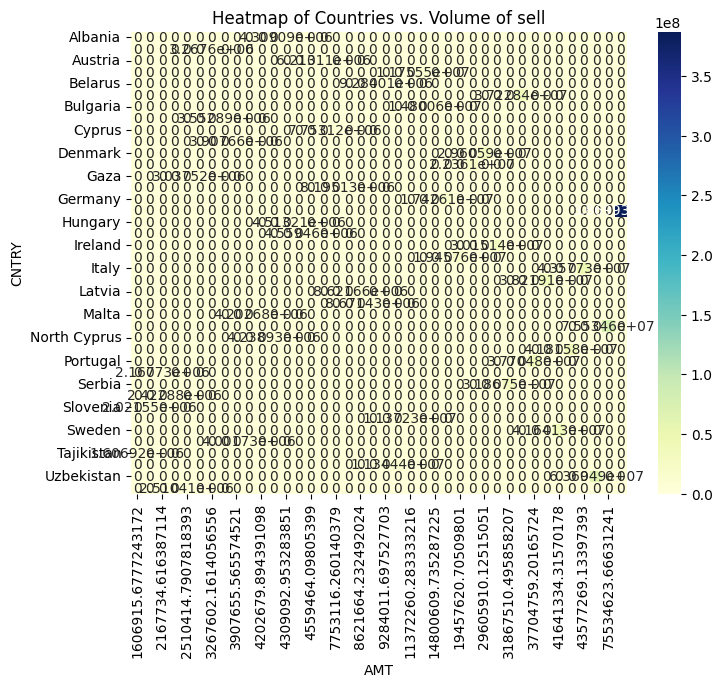

In [53]:
# Group by 'Category' and calculate the sum of 'Value' in each group
data_country = data.groupby('CNTRY')['AMT'].sum().reset_index()
heatmap_data = data_country.pivot('CNTRY', 'AMT', 'AMT').fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', cbar=True)
plt.title('Heatmap of Countries vs. Volume of sell')
plt.show()

Tras intentar ver los resultados en un 'heat map', observo que al ser tantos países distintos no se ve con claridad.

Se hace uso de un 'heat map' ya que este, a través de los diferentes colores e intensidades, permite ver con facilidad cuales son los países (en este caso) con más y menos volumen de ventas.

No ha resultado un gran acierto para nuestro dataset debido al gran número de variables con las que cuenta (40 países distintos).

Por ello a continuación, procedo a realizar un gráfico de barras que me permita ver todos los países y las diferencias que hay entre cada uno de ellos en cuanto a la variable AMT (volumen de ventas). Se elige el diagrama de barras, ya que este permite ver limpiamente los datos por separado haciendo una comparativa por alturas. Además, no importa el número de variables (países) que tenga el dataset.

<ipython-input-24-a8572117a456>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_country = data.groupby('CNTRY').sum()


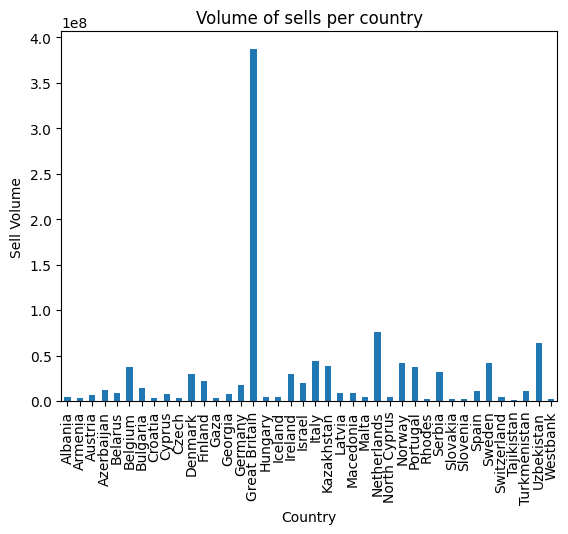

In [24]:
data_country = data.groupby('CNTRY').sum()

data_country['AMT'].plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Sell Volume')
plt.title('Volume of sells per country')
plt.show()

Como interesa saber cuales son los países con menos volumen de ventas, procedo a eliminar del dataset los tres países que se ve claramente que tienen mayor volumen de datos para poder distinguir con nitidez cuales son los que menos tienen.

La idea de eliminar estos, es por el hecho de que no es nada sencillo medir de manera óptima cuáles son los que más o menos ventas tienen si la diferencia de los datos es tan grande.

In [44]:
data_new = data.loc[(data['CNTRY'] != 'Great Britain') & (data['CNTRY'] != 'Netherlands') & (data['CNTRY'] != 'Uzbekistan')]
data_country = data_new.groupby('CNTRY').sum()

<ipython-input-44-1a001ec4f308>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_country = data_new.groupby('CNTRY').sum()


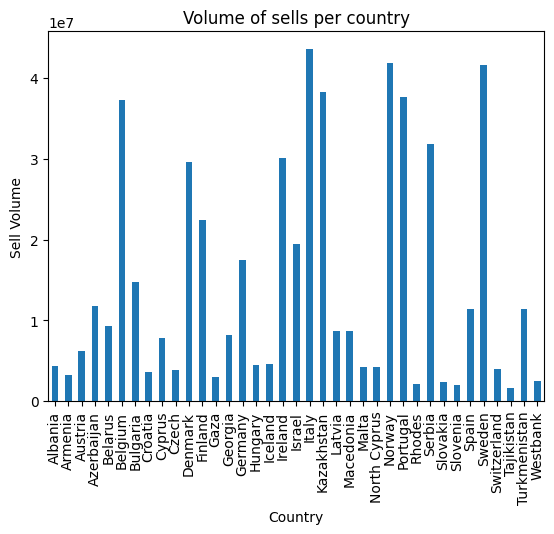

In [45]:
data_country['AMT'].plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Sell Volume')
plt.title('Volume of sells per country')
plt.show()

Tras observar el gráfico de barras se observa que hay un gran número de países con un volumen bajo de ventas. A la hora de escoger uno de ellos para mejorar las mismas, supone un trabajo difícil.

Me centraría en uno de los que menos tiene, como Slovenia, Tajikistan o Rhodes, ya que aumentando sus ventas, la media europea subiría, pero también se reducirían el número de outliers por abajo. Si por ejemplo, aumentáramos las ventas de Great Britain, se descompensarían más todavía los volúmenes de venta de los países europeos, pudiendo llegar a considerarse los nombrados previamente como outliers por debajo y Great Britain por arriba.

Veamos cuál de los 3 países con menos volumen de ventas es el que tiene menos con otra gráfica de barras.

<ipython-input-52-d577ebd9e6f7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_country = data_new.groupby('CNTRY').sum()


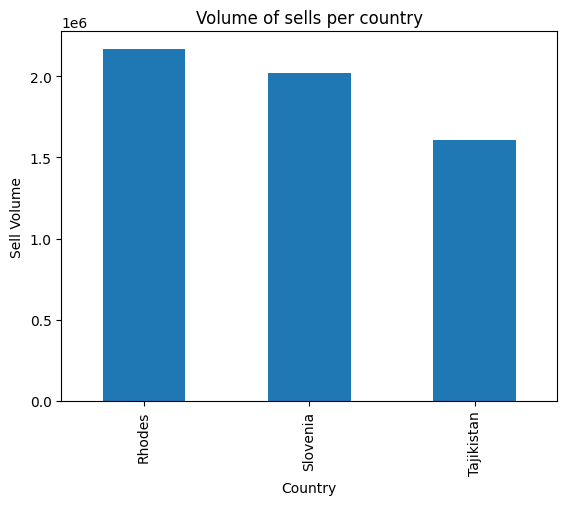

In [52]:
data_new = data.loc[(data['CNTRY'] == 'Slovenia') | (data['CNTRY'] == 'Tajikistan') | (data['CNTRY'] == 'Rhodes')]
data_country = data_new.groupby('CNTRY').sum()

data_country['AMT'].plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Sell Volume')
plt.title('Volume of sells per country')
plt.show()

Al observar que Tajikistan es el país con menos volumen de ventas de los países europeos del dataframe, sería el país en el que mejoraría las ventas.

Y si además, tuviera la opción de mejorar las ventas de algunos países con la condición de reducir las ventas de otros, también lo realizaría puesto que esto hace que Europa no solo mantenga la media de volumen de ventas, sino que también sería un continente más equitativo en cuanto a este parámetro. Es decir, no habría diferencias tan grandes entre los distintos países y por tanto, la economía de cada uno de ellos estaría más igualada, dando esto lugar a menos conflictos entre naciones.